In [5]:
from meshed import code_to_dag
from front.crude import prepare_for_crude_dispatch
from functools import partial
from mall import mall
from front.dag import crudify_func_nodes


@code_to_dag
def dag():
    talking_points = get_talking_points(topic, n_talking_points)
    illustration_description = make_illustration_description(talking_point, image_style)
    img_url = make_illustration(illustration_description, image_style)
    slide = aggregate_story_and_image(img_url, story_text)


funcs = list(dag.find_funcs())

# ------------------------------------------------------------------------------
# Adding persistence
# q, f, g, r = funcs

# crudifier = partial(
#     prepare_for_crude_dispatch, mall=mall, include_stores_attribute=True
# )


# def f(talking_point):
#     return f"image of {talking_point}"


# def g(illustration_description):
#     return illustration_description.upper()


# ff = crudifier(
#     output_store='illustration_description_store', output_trans=lambda: None
# )(f)
# gg = crudifier(
#     param_to_mall_map={'illustration_description': 'illustration_description_store'},
#     output_trans=lambda: None,
# )(g)


# funcs = [ff, gg, debug]

# ------------------------------------------------------------------------------
# crudifying the dag


cdag = crudify_func_nodes('illustration_description', dag, mall=mall, include_stores_attribute=True)
crudified_funcs = list(dag.find_funcs())

# ------------------------------------------------------------------------------
# Adding persistence


def debug(x):
    return mall


q, f, g, r = crudified_funcs
funcs = [f, g, debug]


In [6]:
f

functools.partial(<function _place_holder_func at 0x7fe5923ebb50>, _sig=<Sig (talking_point, image_style)>)

In [7]:
g

functools.partial(<function _place_holder_func at 0x7fe5923ebb50>, _sig=<Sig (illustration_description, image_style)>)

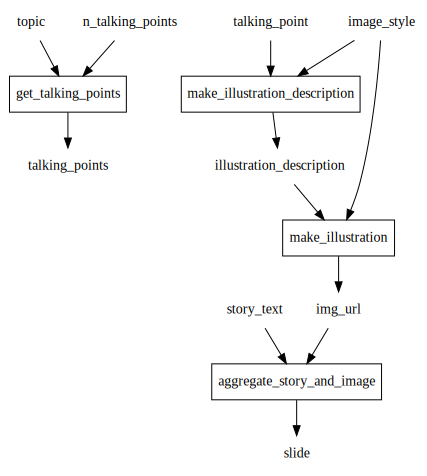

In [8]:
cdag.dot_digraph()

In [10]:
dir(f)

['__annotations__',
 '__call__',
 '__class__',
 '__class_getitem__',
 '__defaults__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__kwdefaults__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__signature__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__vectorcalloffset__',
 'args',
 'func',
 'keywords']

In [11]:
f.keywords

{'_sig': <Sig (talking_point, image_style)>}